In [200]:
#Задание 1
#Импортируйте библиотеки pandas, numpy и matplotlib.
#Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
#Создайте датафреймы X и y из этих данных.
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
#с помощью функции train_test_split так, чтобы размер тестовой выборки
#составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
#Масштабируйте данные с помощью StandardScaler.
#Постройте модель TSNE на тренировочный данных с параметрами:
#n_components=2, learning_rate=250, random_state=42.
#Постройте диаграмму рассеяния на этих данных.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [201]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [202]:
data_boston = boston.data
data_boston.shape

(506, 13)

In [203]:
X = pd.DataFrame(data_boston, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [204]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [206]:
scaled = StandardScaler()

In [207]:
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.transform(X_test)

In [213]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston.feature_names)

In [214]:
from sklearn.manifold import TSNE
X_train_TSNE = TSNE(n_components=2,learning_rate=250, random_state=42).fit_transform(X_train_scaled)

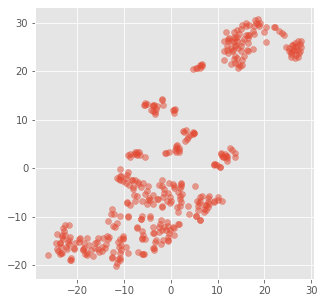

In [215]:
#для отображения графика непосредственно в юпитере
%matplotlib inline

#размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

plt.style.use('ggplot')

plt.scatter(X_train_TSNE[:,0],X_train_TSNE[:,1],alpha=0.5)
plt.show()



In [216]:
#Задание 2
#С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
#используйте все признаки из датафрейма X_train.
#Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
#Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
#и раскрасьте точки из разных кластеров разными цветами.
#Вычислите средние значения price и CRIM в разных кластерах.

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)



In [217]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

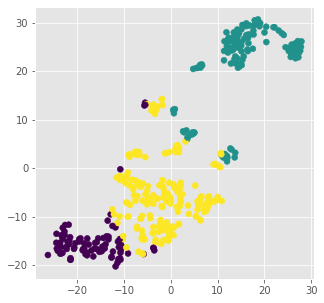

In [218]:
plt.scatter(X_train_TSNE[:,0],X_train_TSNE[:,1],c=labels_train)
plt.show()

In [219]:
y_train.mean()

price    22.796535
dtype: float64

In [220]:
y_train[labels_train==0].mean()

price    27.788372
dtype: float64

In [221]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [222]:
y_train[labels_train==2].mean()

price    24.958115
dtype: float64

In [223]:
X_train.loc[labels_train==0,"CRIM"].mean()

0.07356558139534886

In [224]:
X_train.loc[labels_train==1,"CRIM"].mean()

10.797028425196853

In [225]:
X_train.loc[labels_train==2,"CRIM"].mean()

0.42166020942408367

In [226]:
#* Задание 3
#Примените модель KMeans, построенную в предыдущем задании,
#к данным из тестового набора.
#Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

labels_test = kmeans.fit_predict(X_test_scaled)
pd.value_counts(labels_test)

1    53
2    35
0    14
dtype: int64

In [227]:
y_test.mean()

price    21.488235
dtype: float64

In [228]:
y_test[labels_test==0].mean()

price    33.871429
dtype: float64

In [229]:
y_test[labels_test==1].mean()

price    21.55283
dtype: float64

In [230]:
y_test[labels_test==2].mean()

price    16.437143
dtype: float64

In [231]:
X_test.loc[labels_test==0,"CRIM"].mean()

0.08618571428571427

In [232]:
X_test.loc[labels_test==1,"CRIM"].mean()

0.25200716981132076

In [233]:
X_test.loc[labels_test==2,"CRIM"].mean()

10.165531142857143